In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [43]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df.isnull().sum().sum()

0

In [51]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [59]:
df["customerID"].duplicated().sum()

0

In [61]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easter to understand

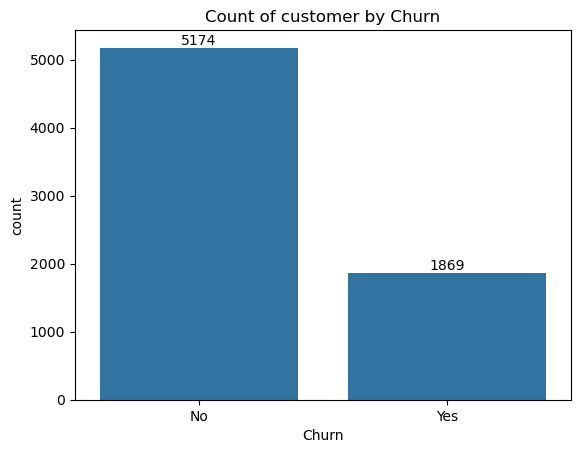

In [104]:
ax = sns.countplot(x = 'Churn',data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")
plt.show()

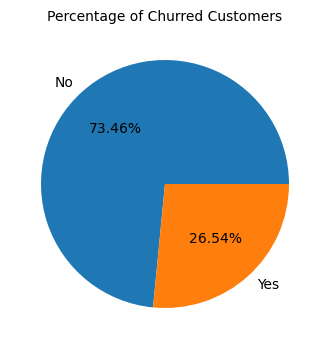

In [102]:
plt.figure(figsize = (4,5))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churred Customers", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customer have churned out. # not let's explore the reason behind it

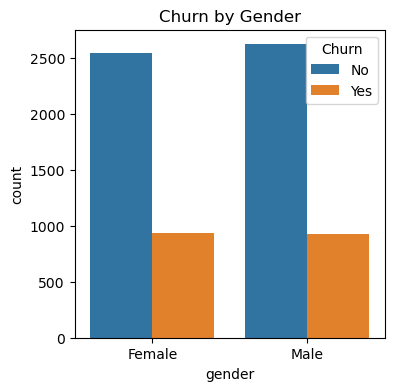

In [125]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

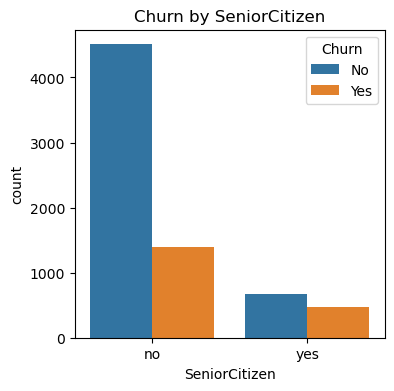

In [127]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

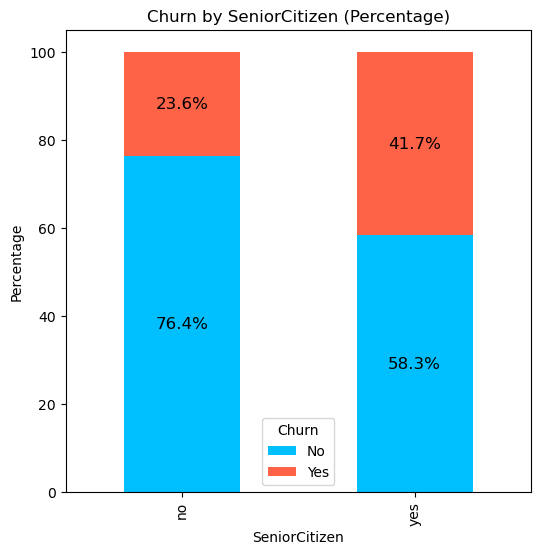

In [135]:
# Assuming df is your DataFrame
# Calculate the percentage of Churn for each SeniorCitizen group
pivot_df = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(6,6), color=["#00BFFF", "#FF6347"])

# Add percentage labels on the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()  # Get the (x,y) position of the bar
    ax.annotate(f'{height:.1f}%', (x + width / 2., y + height / 2.), 
                ha='center', va='center', color='Black', fontsize=12)

plt.title("Churn by SeniorCitizen (Percentage)")
plt.ylabel("Percentage")
plt.show()

#comparative a greated percentage of people in senior citizen category have churned

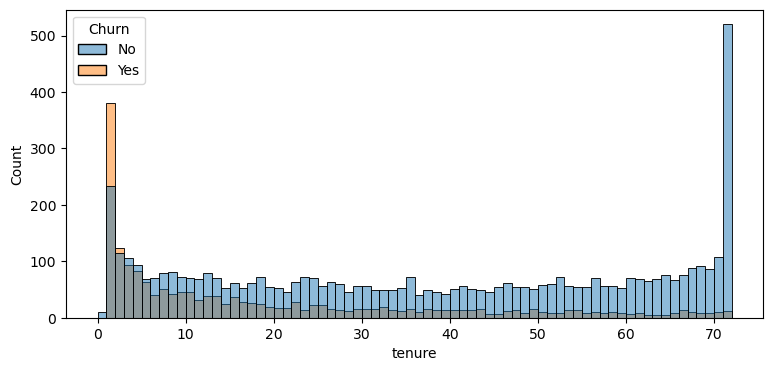

In [144]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn" )
plt.show()

#people who have used our services for a long time have stayed and people who have used our service #1 or 2 months have churned

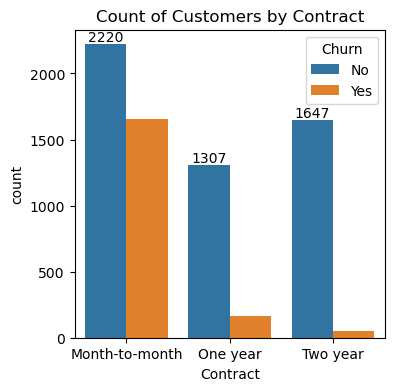

In [7]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [13]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23044\2460871924.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for readability
C:\Users\DELL\AppData\Local\Temp\ipykernel_23044\2460871924.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for readability
C:\Users\DELL\AppData\Local\Temp\ipykernel_23044\2460871924.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for readability
C:\Users\DELL\AppData\Local\Temp\ipykernel_23044\2460871924.py:14: UserWarni

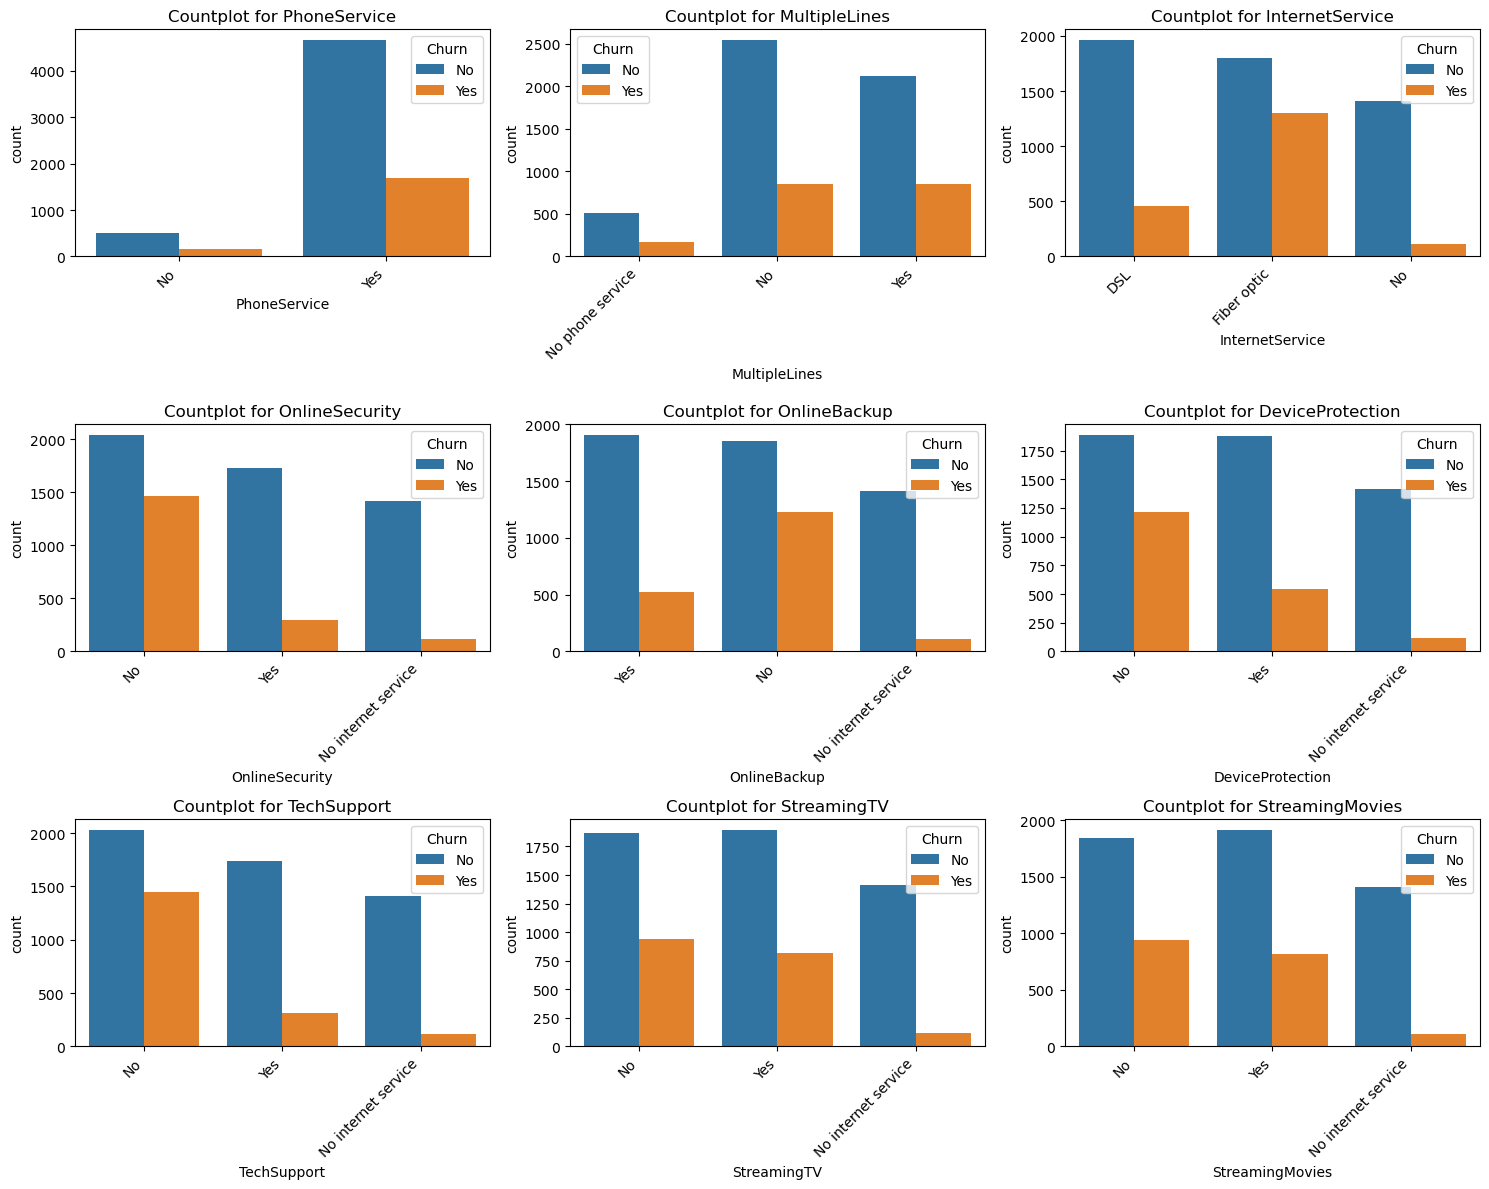

In [29]:
# Assuming your dataframe is called df
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Adjust size as needed
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to loop over

# Loop through each column and plot a countplot in each subplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Countplot for {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#The majoritiy of customers who do not churn tend to have service like PhoneService, InternetService (particularly DSL),and OnlineSecurity enabled. For OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

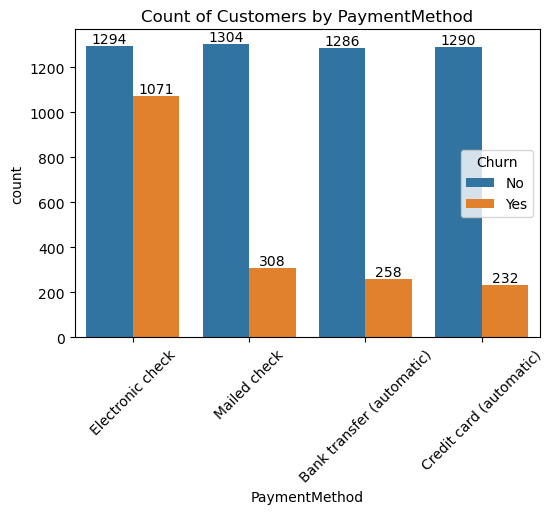

In [38]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as payment method.